In [4]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [14]:
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [50]:
def update_record(record, action, reward):
    k = record[action, 0]
    mean_reward = (k*(record[action, 1]) + reward) / (k+1)
    record[action] = [k+1, mean_reward]
    return record

In [63]:
def get_best_arm(record):
    return np.argmax(record[:, 1], axis=0)

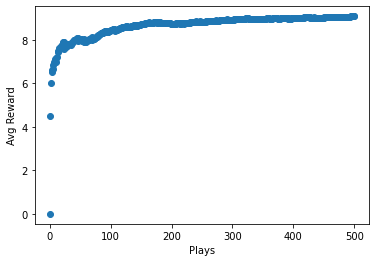

In [78]:
n = 10
probs = np.random.rand(n)
eps = 0.2
record = np.zeros((n, 2))
rewards = [0]


fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")

for t in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
        
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((t+1) * rewards[-1] + r) / (t+2)
    rewards.append(mean_reward)

ax.scatter(np.arange(len(rewards)), rewards)
    

In [95]:
def softmax(vals, tau=1.12):
    return np.exp(vals/tau) / np.sum(np.exp(vals/tau))

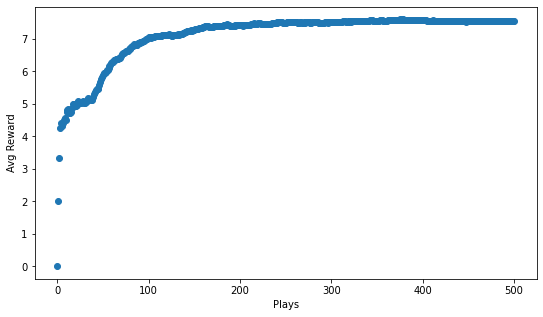

In [120]:
n = 10
record = np.zeros((n, 2))
rewards = [0]
ran_probs = np.random.rand(n)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(9,5)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")

for t in range(500):
    probs = softmax(record[:, 1])
    choice = np.random.choice(np.arange(n), p = probs)
    r = get_reward(ran_probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((t+1) * rewards[-1] + r) / (t+2)
    rewards.append(mean_reward)

ax.scatter(np.arange(len(rewards)), rewards)
    

In [121]:
record

array([[377.        ,   8.25464191],
       [  0.        ,   0.        ],
       [ 45.        ,   5.        ],
       [ 20.        ,   6.65      ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [ 44.        ,   5.13636364],
       [  0.        ,   0.        ],
       [ 14.        ,   6.78571429],
       [  0.        ,   0.        ]])